# EJERCICIO 1

Se tomo como dataSet la siguiente fuente de información https://www.kaggle.com/datasets/rahulsah06/titanic?select=test.csv

### Importación de Librerias Necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score



## Análisis de Data

In [3]:
data = pd.read_csv('Data_Ejercicio_1/train.csv')

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Descripción de la data:

* PassengerId: Id del Pasajero
* Survived: Flag que indica si sobrevivio o no
* Pclass: Tipo de Clase
* Name: Nombre del Pasajero
* Sex: Género del Pasajero
* Age: Edad del Pasajero
* SibSp: Número de hermanos/cónyuges a bordo del Titanic	
* Parch: Número de padres/hijos a bordo del Titanic
* Ticket: Número de billete
* Fare: Tarifa de pasajero
* Cabin: Número de cabina
* Embarked: Puerto de embarque, C = Cherburgo, Q = Queenstown, S = Southampton

In [6]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
numericas = data.select_dtypes(include=['number']).columns.tolist()
categoricas = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)

Variables numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Variables categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


<Axes: >

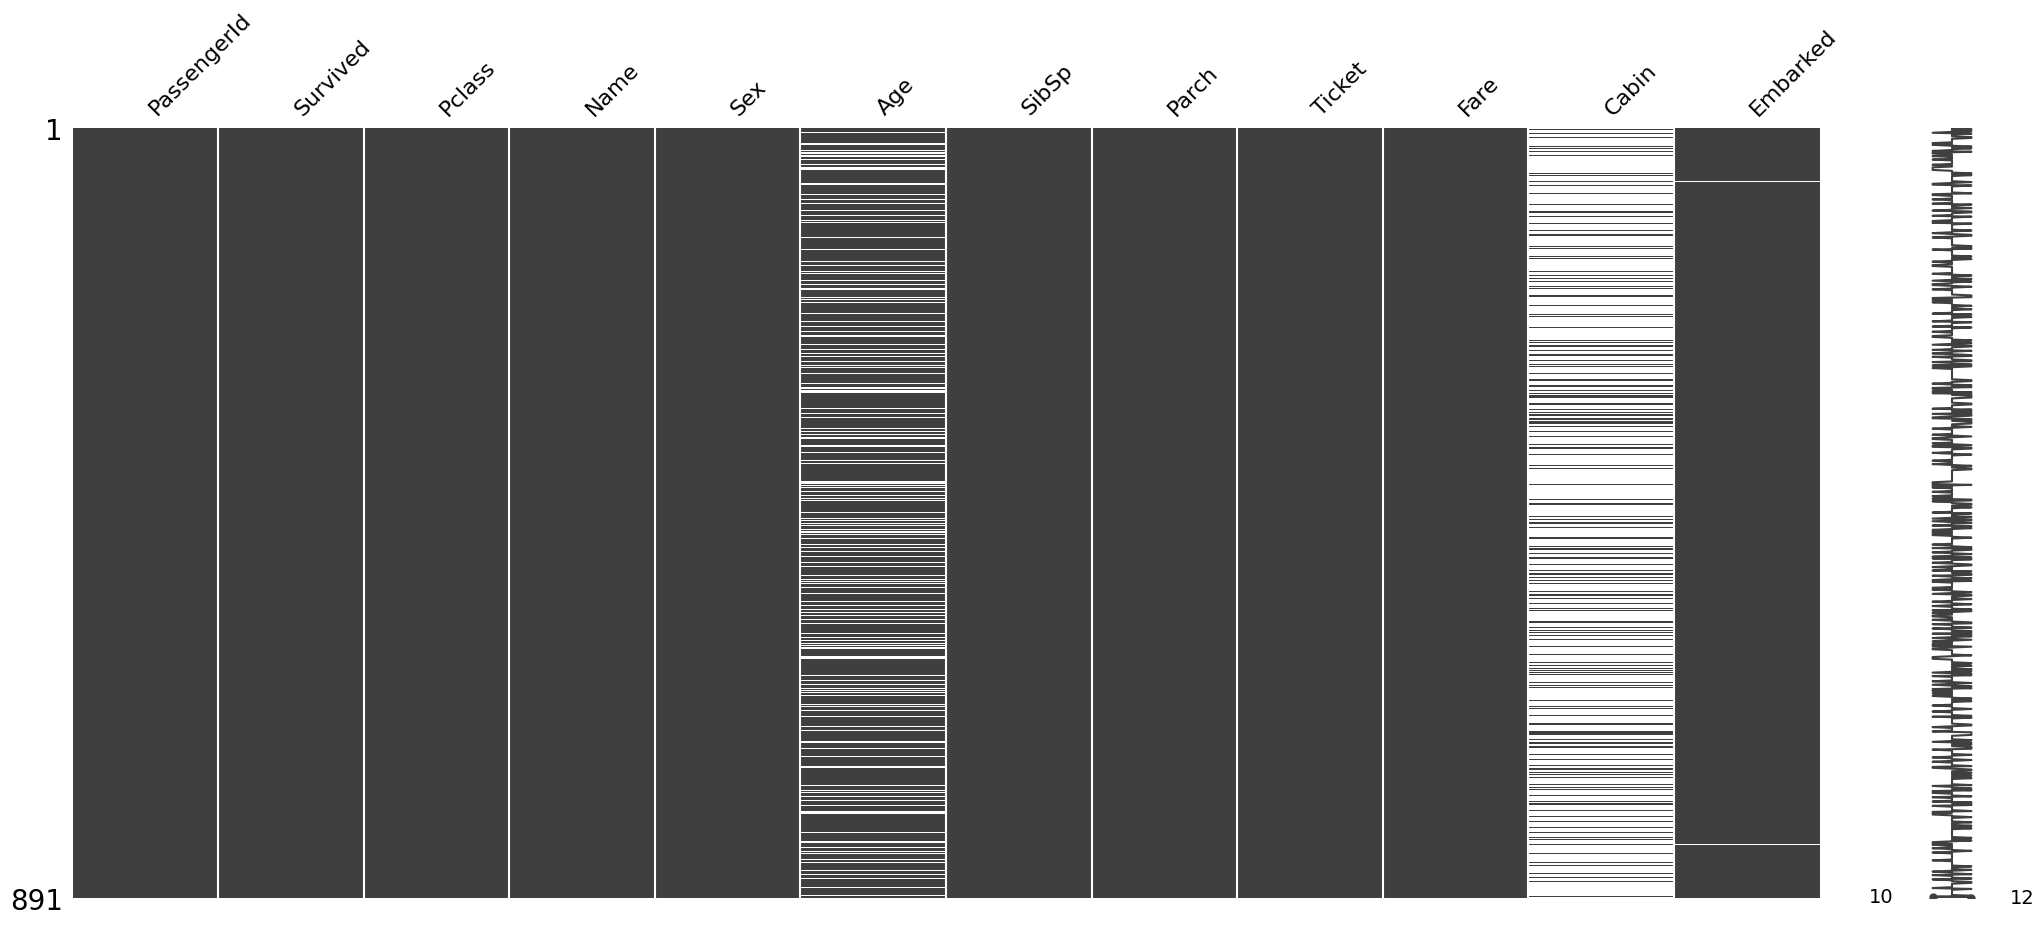

In [9]:
msno.matrix(data)

Con el grafico de Matriz, podemos ver que valores son los que tienen más valores nulos, entonces sacaremos el % de cada 1

In [10]:
null_percentage_per_column = data.isnull().mean() * 100

print("Porcentaje de valores nulos por columna:")
print(null_percentage_per_column)

Porcentaje de valores nulos por columna:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


* Como se puede ver, la edad es un valor que cada persona tiene pero en la data hay un 19.86% que no se tiene el dato. Al ser menor al 20% de la data total eliminaremos ese registro para futuros análisis.
* Para el caso de Cabin, al ser considerado un dato no relevante, se cambiara el nulo por 'Sin Cabina'
* Se eliminara los registros que no tienen punto de embarque 

In [11]:
data_limpia = data.dropna(subset=['Age','Embarked'])
data_limpia = data_limpia.fillna('Sin Cabina')

In [12]:
null_percentage_per_column = data_limpia.isnull().mean() * 100

print("Porcentaje de valores nulos por columna:")
print(null_percentage_per_column)

Porcentaje de valores nulos por columna:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64


Con esa limpieza, observaremos los datos outlayer y las variables catégoricas


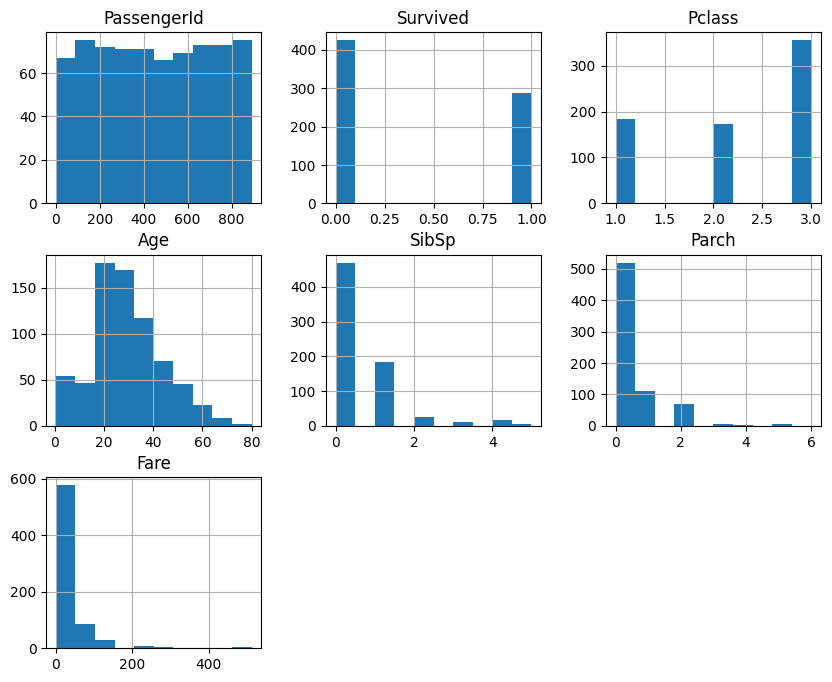

In [13]:
data_limpia.hist(figsize=(10, 8))
plt.show()

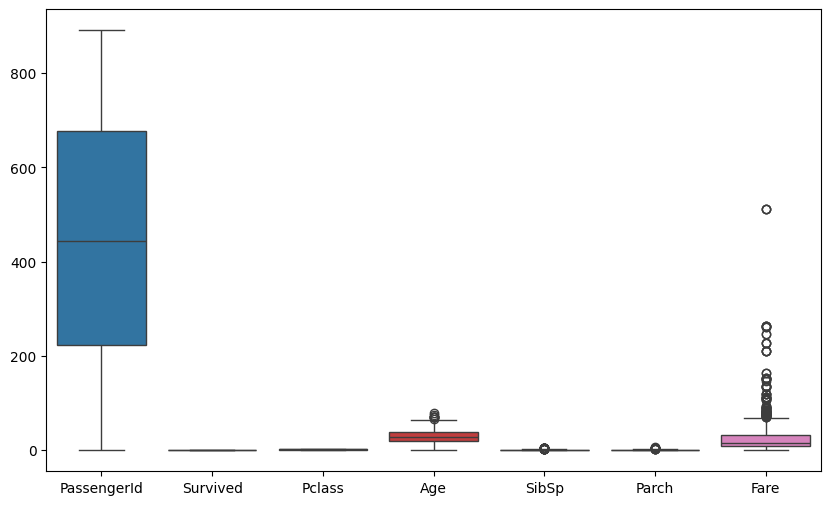

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_limpia)
plt.show()

Modificamos la variable categorica de Sex, Embarked y Cabin para que puedan entrar en el análisis numerico 

In [15]:
data_limpia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Sin Cabina,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Sin Cabina,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Sin Cabina,S


In [16]:
data_limpia['Genero'] = data_limpia['Sex']
data_limpia['Genero'] = data_limpia['Genero'].replace(['male'],'0')
data_limpia['Genero'] = data_limpia['Genero'].replace(['female'],'1')
data_limpia['Genero'] = data_limpia['Genero'].astype('int')
data_limpia['Embarque'] = data_limpia['Embarked']
data_limpia['Embarque'] = data_limpia['Embarque'].replace(['C'],'1')
data_limpia['Embarque'] = data_limpia['Embarque'].replace(['Q'],'2')
data_limpia['Embarque'] = data_limpia['Embarque'].replace(['S'],'3')
data_limpia['Embarque'] = data_limpia['Embarque'].astype('int')
data_limpia['Cabina'] = data_limpia['Cabin']
data_limpia['Cabina'] = data_limpia['Cabina'].mask(data_limpia['Cabina'] != 'Sin Cabina', '1')
data_limpia['Cabina'] = data_limpia['Cabina'].replace(['Sin Cabina'],'0')
data_limpia['Cabina'] = data_limpia['Cabina'].astype('int')

Volvemos a calcular las nuevas variables númericas que entrarian en el análisis

In [17]:
numericas = data_limpia.select_dtypes(include=['number']).columns.tolist()
categoricas = data_limpia.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)

Variables numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Genero', 'Embarque', 'Cabina']
Variables categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


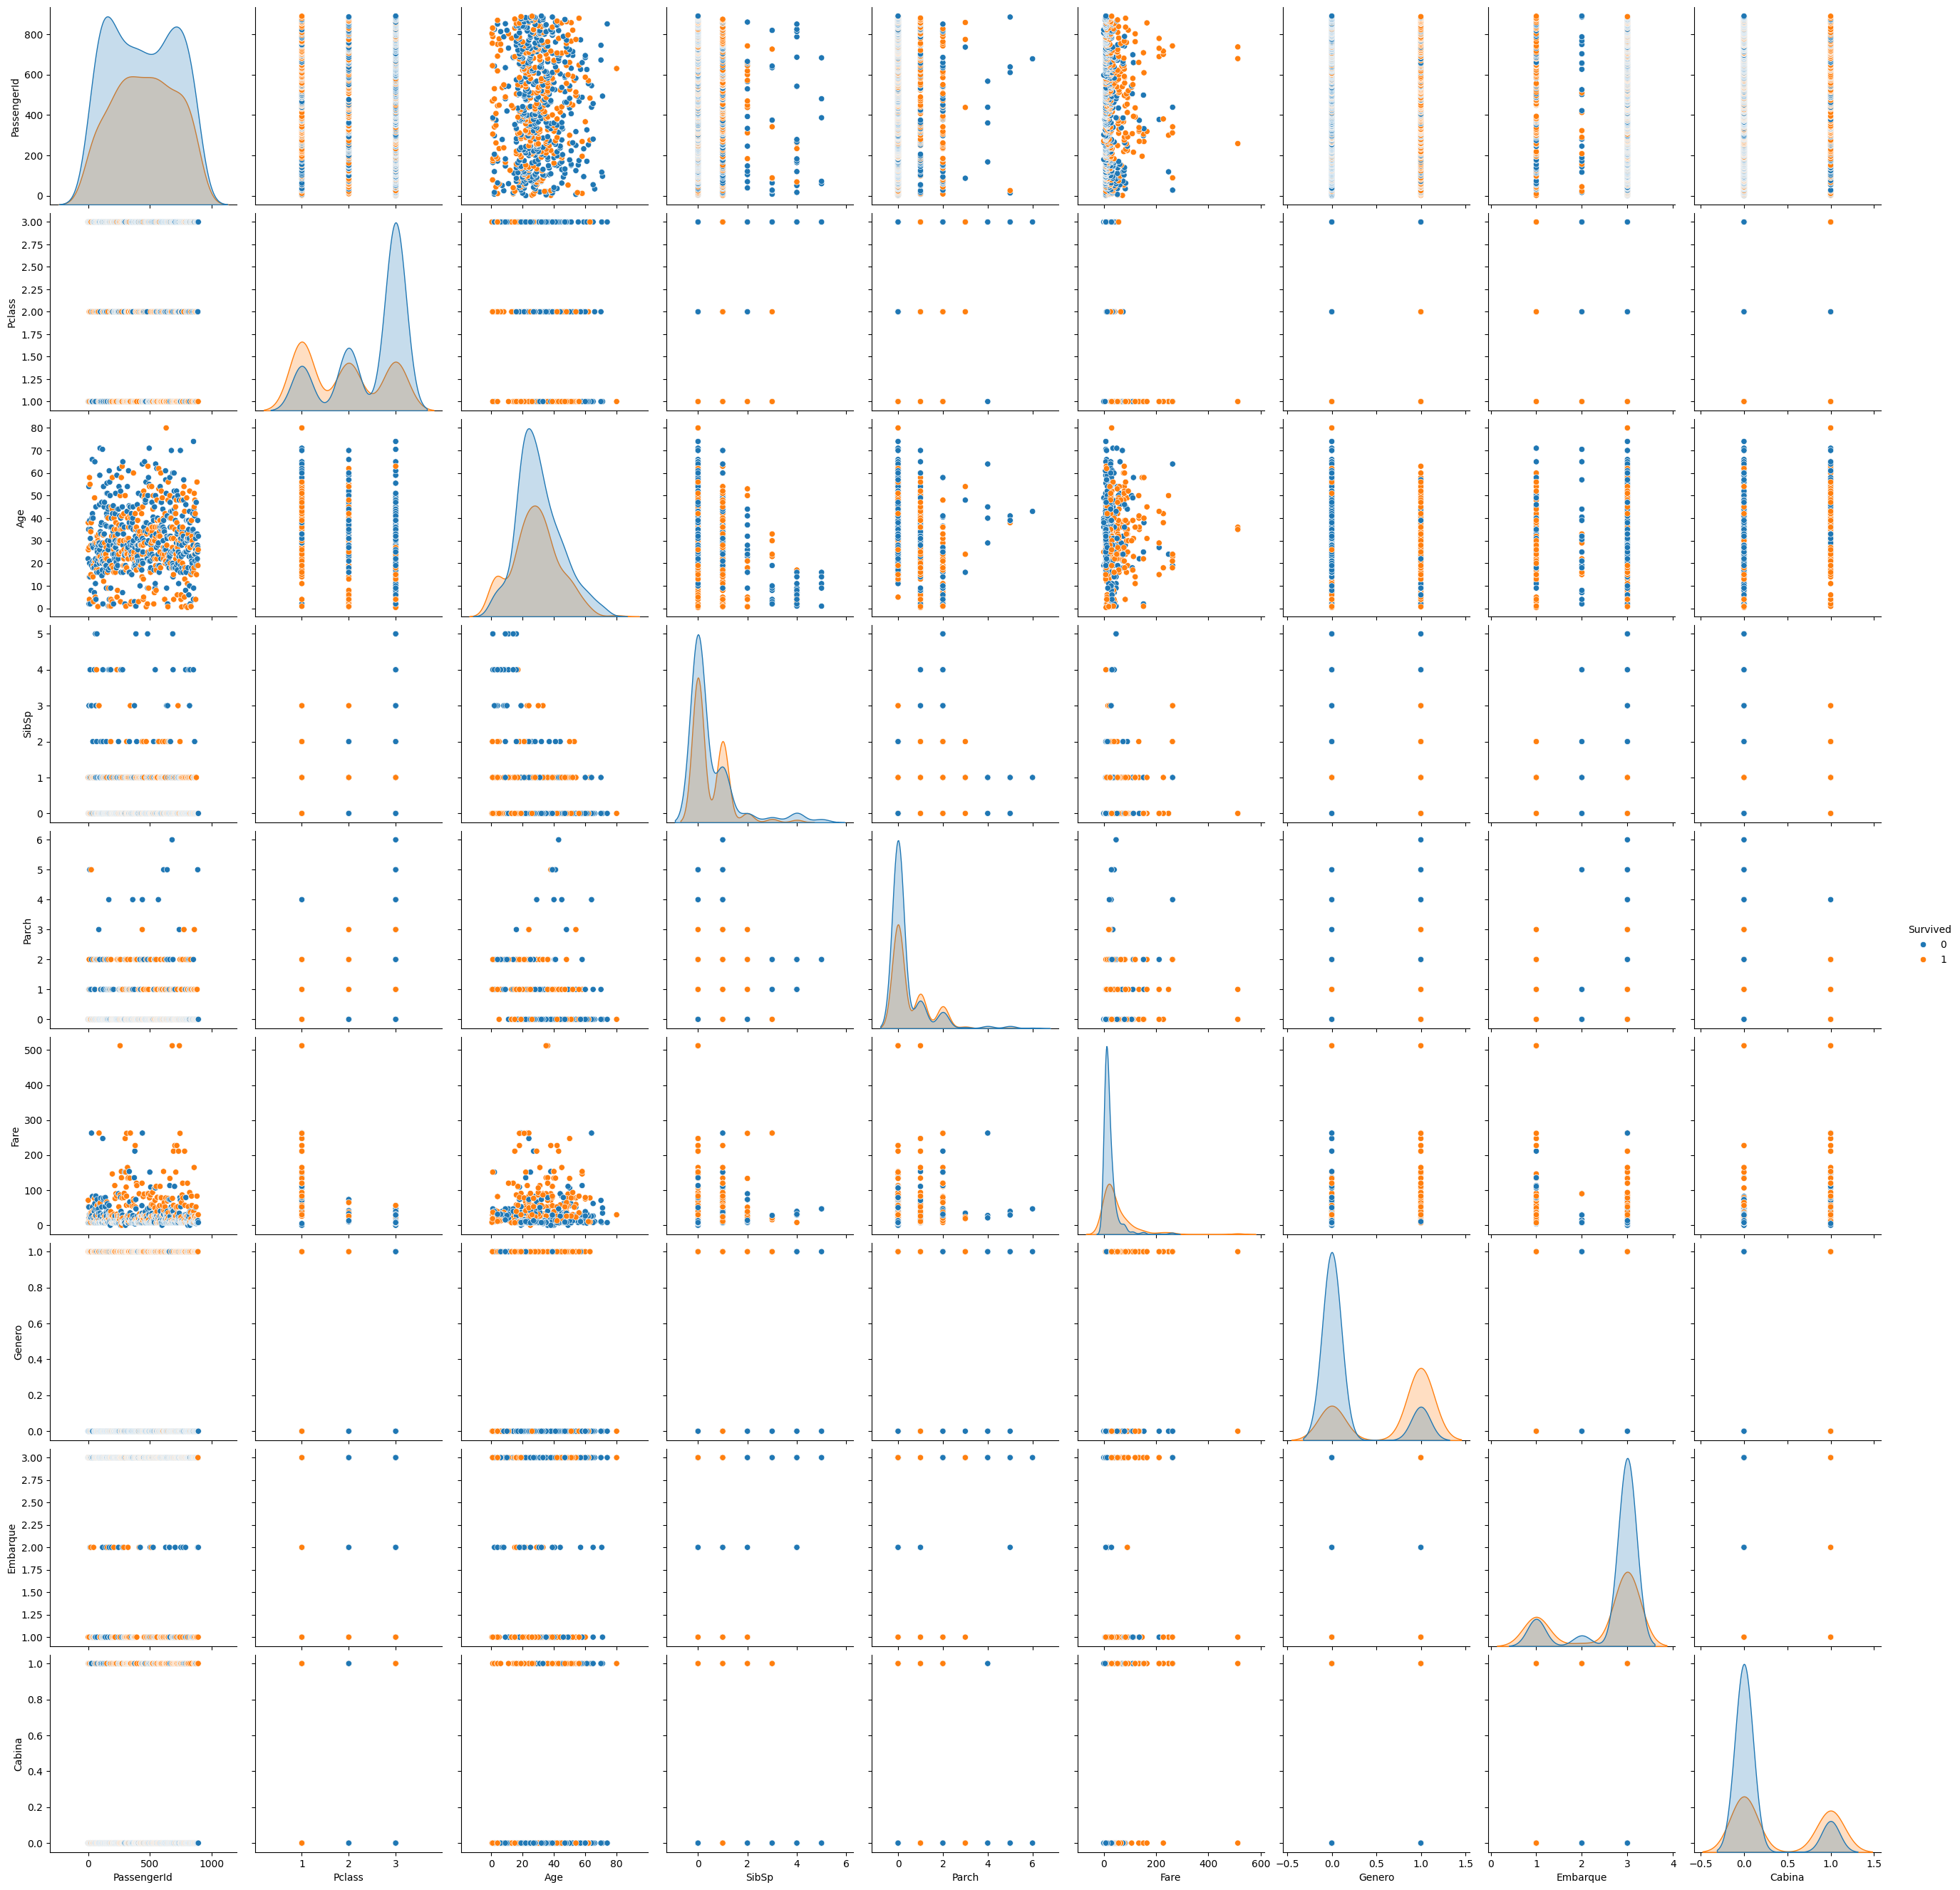

In [18]:
sns.pairplot(data_limpia, height=3, diag_kind = 'kde', hue='Survived')

Cruzamos las variables numéricas entre ellas y adiconalmente agregamos el Target para conocer la distribución y comenzar a generar hipótesis de variables que discriminan mejor a ambos grupos (sobrevivientes y no sobrevivientes).

<Axes: >

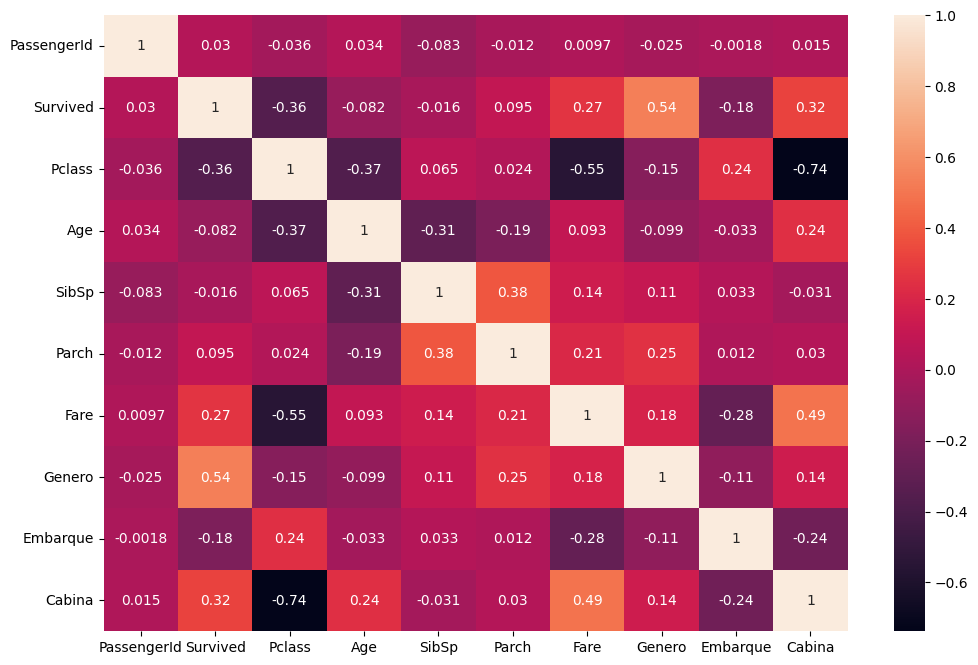

In [19]:
corr = data_limpia[numericas].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

Se puede observar que se tiene cierta relación, entre las variables, incluso relación inversa entre algunas variables, pero no hay correlación lineal entre ellas

In [20]:
data_limpia = data_limpia[numericas]

In [21]:
data_limpia.size

7120

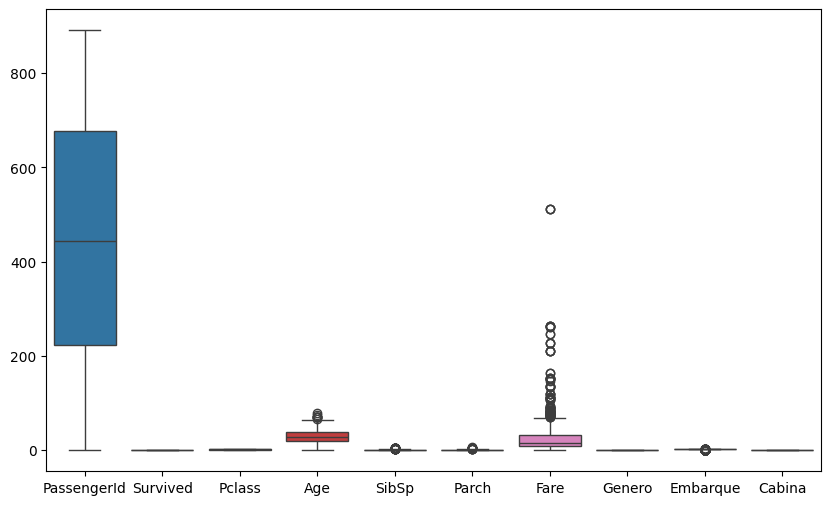

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_limpia)
plt.show()

Se ve ciertos outlayers

In [23]:
# Calcular Q1, Q3 y el IQR para cada columna
Q1 = data_limpia.quantile(0.25)
Q3 = data_limpia.quantile(0.75)
IQR = Q3 - Q1

# Identificar los valores fuera del rango IQR
filter_condition = (data_limpia >= (Q1 - 1.5 * IQR)) & (data_limpia <= (Q3 + 1.5 * IQR))

# Aplicar el filtro y eliminar los outliers
df_clean = data_limpia[filter_condition.all(axis=1)]

print(df_clean)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Genero  \
0              1         0       3  22.0      1      0   7.2500       0   
2              3         1       3  26.0      0      0   7.9250       1   
3              4         1       1  35.0      1      0  53.1000       1   
4              5         0       3  35.0      0      0   8.0500       0   
6              7         0       1  54.0      0      0  51.8625       0   
..           ...       ...     ...   ...    ...    ...      ...     ...   
882          883         0       3  22.0      0      0  10.5167       1   
883          884         0       2  28.0      0      0  10.5000       0   
884          885         0       3  25.0      0      0   7.0500       0   
886          887         0       2  27.0      0      0  13.0000       0   
887          888         1       1  19.0      0      0  30.0000       1   

     Embarque  Cabina  
0           3       0  
2           3       0  
3           3       1  
4  

Se ve que al intentar eliminar ciertos outlayers de pierde más del mucha información, por esa razón se continuará haciendo los modelos con esa data

# Ejercicio 2

In [24]:
data_limpia.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Genero,Embarque,Cabina
0,1,0,3,22.0,1,0,7.2500,0,3,0
1,2,1,1,38.0,1,0,71.2833,1,1,1
2,3,1,3,26.0,0,0,7.9250,1,3,0
3,4,1,1,35.0,1,0,53.1000,1,3,1
4,5,0,3,35.0,0,0,8.0500,0,3,0


Dividimos la data para prueba y entrenamiento

In [25]:
x = data_limpia[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Genero','Embarque','Cabina']]
y = data_limpia['Survived']
x = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
lista_resultados = []

## 1. Regresión Logística

In [27]:
model = sm.Logit(y_train, X_train)
result = model.fit()


y_pred_prob = result.predict(sm.add_constant(X_test)) 


y_pred = (y_pred_prob >= 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)


auc = roc_auc_score(y_test, y_pred_prob)

print(f"Exactitud del modelo: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print(f"AUC (Área bajo la curva ROC): {auc:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nImportancia de las características:")
print(result.params)
lista_resultados.append(['Regresión Logistica',accuracy,precision,recall,f1,auc])


Optimization terminated successfully.
         Current function value: 0.410777
         Iterations 7
Exactitud del modelo: 0.7897
Precision: 0.7901
Recall: 0.6957
F1-Score: 0.7399

Matriz de Confusión:
[[105  17]
 [ 28  64]]
AUC (Área bajo la curva ROC): 0.8151

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       122
           1       0.79      0.70      0.74        92

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214


Importancia de las características:
const          2.830452
PassengerId    0.000312
Pclass        -1.370799
Age           -0.040954
SibSp         -0.290196
Parch          0.014813
Fare          -0.001133
Genero         2.850519
Embarque      -0.115790
Cabina         0.487621
dtype: float64


## 2. Random Forest

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.4f}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


if len(set(y_test)) == 2: 
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  
    print(f'AUC (Área bajo la curva ROC): {auc:.4f}')


print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nImportancia de las características:", model.feature_importances_)
print("\nParámetros del modelo Random Forest:", model.get_params())
lista_resultados.append(['Ramdon Forest',accuracy,precision,recall,f1,auc])

Exactitud del modelo: 0.7710
Precision: 0.7654
Recall: 0.6739
F1-Score: 0.7168

Matriz de Confusión:
[[103  19]
 [ 30  62]]
AUC (Área bajo la curva ROC): 0.8238

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81       122
           1       0.77      0.67      0.72        92

    accuracy                           0.77       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214


Importancia de las características: [0.         0.16576975 0.09682169 0.17554385 0.03590918 0.02678696
 0.17544003 0.2530801  0.02170371 0.04894473]

Parámetros del modelo Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': 

## 3. Naive Bayes

In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

if len(set(y_test)) == 2:  
    auc = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
    print("AUC (Área bajo la curva ROC):", auc)

lista_resultados.append(['Naive Bayes',accuracy,precision,recall,f1,auc])

Accuracy: 0.7149532710280374
Precision: 0.6823529411764706
Recall: 0.6304347826086957
F1-Score: 0.655367231638418

Matriz de Confusión:
[[95 27]
 [34 58]]
AUC (Área bajo la curva ROC): 0.7729864575908767


### Revisión de modelos

Se revisa las variables de los modelos

In [30]:
resultados_modelos = pd.DataFrame(lista_resultados,columns=['Modelo','Accuracy','Precision','Recall','F1','AUC (Área bajo la curva ROC)'])
resultados_modelos

,Modelo,Accuracy,Precision,Recall,F1,AUC (Área bajo la curva ROC)
0,Regresión Logistica,0.789720,0.790123,0.695652,0.739884,0.815128
1,Ramdon Forest,0.771028,0.765432,0.673913,0.716763,0.823815
2,Naive Bayes,0.771028,0.682353,0.630435,0.655367,0.772986


1. Comparación por Exactitud (Accuracy)
Para este caso, el modelo de Regresión Logistica tiene la mayor exactitud (0.789720), lo que significa que es el modelo con la mayor proporción de predicciones correctas.

2. Comparación por Precision
Regresión Logística (0.790123) tiene la mejor precisión, seguida por Random Forest (0.765432) y Naive Bayes (0.682353).

3. Comparación por Recall
En este caso, Regresión Logistica tiene el mejor recall (0.695652), seguido por Ramdon Forest (0.673913) y Naive Bayes (0.630435).

4. Comparación por F1-Score
El F1-Score te da un balance entre precisión y recall. Regresión Logistica tiene el mejor F1-Score (0.739884), seguido por Ramdon Forest (0.716763) y Naive Bayes (0.655367).

5. Comparación por AUC
El AUC (Área bajo la curva ROC) mide la capacidad de un modelo para distinguir entre las clases positivas y negativas. Cuando el AUC sea más cercano a 1 es mejor para distinguir clases.

Ramdon Forest tiene el mejor AUC (0.823815), seguido por Regresión Logistica (0.823815) y Naive Bayes (0.772986).

En Conclusión: Por la validación de las métricas de los modelos, el mejor modelo de los 3 es Regresión Logistica.